In [53]:
from __future__ import print_function, division
import sys
import os
import numpy 
import pylab as pl
import pandas as pd

import json
import os
%pylab inline

import statsmodels.api as sm
import statsmodels.formula.api as smf

Populating the interactive namespace from numpy and matplotlib


/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['isreal']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
# to use the url just pass it to pandas read_excell
url = "http://cosmo.nyu.edu/~fb55/PUI2016/data/"

In [6]:
allmales={"all":nan,"white":nan,"black":nan,"asian":nan,"hispanic":nan}
allfemales={"all":nan,"white":nan,"black":nan,"asian":nan,"hispanic":nan}

In [12]:
allmales["all"] = pd.read_excel( url + 'pinc08_2_1_1.xls',  header=9)
allmales["white"] = pd.read_excel( url + 'pinc08_2_1_4.xls',  header=9)
allmales["black"] = pd.read_excel( url + 'pinc08_2_1_6.xls',  header=9)
allmales["asian"] = pd.read_excel( url + 'pinc08_2_1_8.xls',  header=9)
allmales["hispanic"] = pd.read_excel( url + 'pinc08_2_1_9.xls',  header=9)
allfemales["all"] = pd.read_excel( url + 'pinc08_3_1_1.xls',  header=9)
allfemales["white"] = pd.read_excel( url + 'pinc08_3_1_4.xls',  header=9)
allfemales["black"] = pd.read_excel( url + 'pinc08_3_1_6.xls',  header=9)
allfemales["asian"] = pd.read_excel( url + 'pinc08_3_1_8.xls',  header=9)
allfemales["hispanic"] = pd.read_excel( url + 'pinc08_3_1_9.xls',  header=9)

In [13]:
allfemales['all'].head()

,Characteristic,Total with Income,"$1 to $2,499 or loss","$2,500 to $4,999","$5,000 to $7,499","$7,500 to $9,999","$10,000 to $12,499","$12,500 to $14,999","$15,000 to $17,499","$17,500 to $19,999",...,"$92,500 to $94,999","$95,000 to $97,499","$97,500 to $99,999","$100,000 and over",Median income,Unnamed: 44,Mean income,Unnamed: 46,Gini ratio,Unnamed: 48
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Value\n(Dol.),Standard\nerror (Dol.),Value\n(Dol.),Standard\nerror (Dol.),Ratio,Standard\nerror
1,....Total,109956.0,7590.0,4298.0,5557.0,7874.0,8052.0,5720.0,6768.0,4377.0,...,167.0,285.0,184.0,4442.0,22063,137,31968,250,0.495,0.0025
2,Earnings,74545.0,4198.0,3118.0,3269.0,2662.0,4579.0,1994.0,4134.0,2585.0,...,60.0,236.0,127.0,3535.0,27736,364,36189,307,0.466,0.0032
3,..Wages and Salary,71220.0,3835.0,2954.0,3005.0,2411.0,4309.0,1941.0,3908.0,2484.0,...,61.0,233.0,126.0,3370.0,28402,379,36412,316,0.461,0.0032
4,..Nonfarm Self-Employment,4694.0,1282.0,288.0,410.0,253.0,388.0,84.0,265.0,126.0,...,0.0,0.0,0.0,127.0,10732,399,20942,1123,0.65,0.0162


In [14]:
allfemales['all'].columns

Index([      u'Characteristic',    u'Total with Income',
       u'$1 to $2,499 or loss',     u'$2,500 to $4,999',
           u'$5,000 to $7,499',     u'$7,500 to $9,999',
         u'$10,000 to $12,499',   u'$12,500 to $14,999',
         u'$15,000 to $17,499',   u'$17,500 to $19,999',
         u'$20,000 to $22,499',   u'$22,500 to $24,999',
         u'$25,000 to $27,499',   u'$27,500 to $29,999',
         u'$30,000 to $32,499',   u'$32,500 to $34,999',
         u'$35,000 to $37,499',   u'$37,500 to $39,999',
         u'$40,000 to $42,499',   u'$42,500 to $44,999',
         u'$45,000 to $47,499',   u'$47,500 to $49,999',
         u'$50,000 to $52,499',   u'$52,500 to $54,999',
         u'$55,000 to $57,499',   u'$57,500 to $59,999',
         u'$60,000 to $62,499',   u'$62,500 to $64,999',
         u'$65,000 to $67,499',   u'$67,500 to $69,999',
         u'$70,000 to $72,499',   u'$72,500 to $74,999',
         u'$75,000 to $77,499',   u'$77,500 to $79,999',
         u'$80,000 to $82,499',

In [16]:
for k,v in allfemales.items():
    print("#####", k)
    print(v.describe())
for k,v in allmales.items():
    print("#####", k)
    print(v.describe())

##### hispanic
       Total with Income  $1 to $2,499 or loss  $2,500 to $4,999  \
count          46.000000             46.000000         46.000000   
mean         1908.739130            274.282609        137.717391   
std          3688.718088            568.547923        199.157298   
min             1.000000              0.000000          0.000000   
25%                  NaN                   NaN               NaN   
50%                  NaN                   NaN               NaN   
75%                  NaN                   NaN               NaN   
max         14034.000000           2704.000000        783.000000   

       $5,000 to $7,499  $7,500 to $9,999  $10,000 to $12,499  \
count         46.000000         46.000000           46.000000   
mean         154.043478        188.913043          175.173913   
std          259.111813        321.948569          341.577016   
min            0.000000          0.000000            0.000000   
25%                 NaN               NaN      

In [19]:
for gender in [allmales, allfemales]:
    for k in gender:
        # find non real values in the dataframe with applymap
        isreal  = gender[k].applymap(np.isreal)
        for c in gender[k].columns :
            #i f some but not all values in column are real
            #replace the non real ones
            if isreal.sum()[c] > 0 and isreal.sum()[c] < gender[k].shape[0]:
                gender[k][c][~isreal[c]] =  np.nan
                gender[k][c] = gender[k][c].astype(float)

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


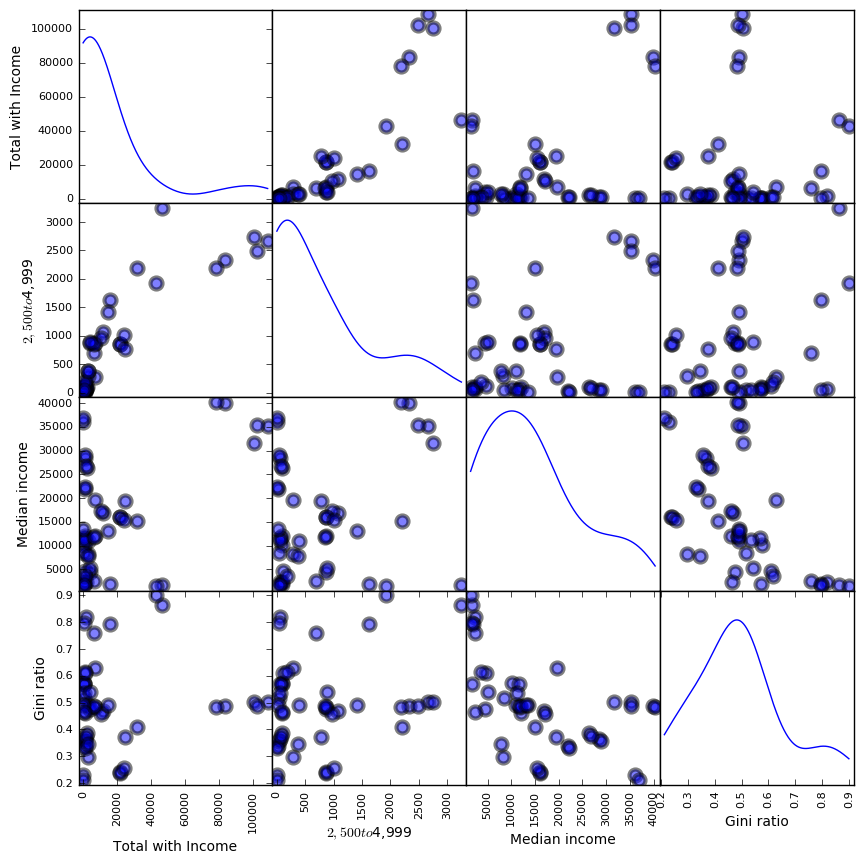

In [28]:
fig = pd.scatter_matrix(allmales['all']
                   [[u'Total with Income',u'$2,500 to $4,999',
                     u'Median income',u'Gini ratio']],
                   linewidth= 3, s=300, figsize=(10,10), 
                        diagonal='kde')  

#### Figure 1: Scatter Matrix of Total Income, USD 2,500 to USD 4,999, Median Income and Gini Ratio for Male

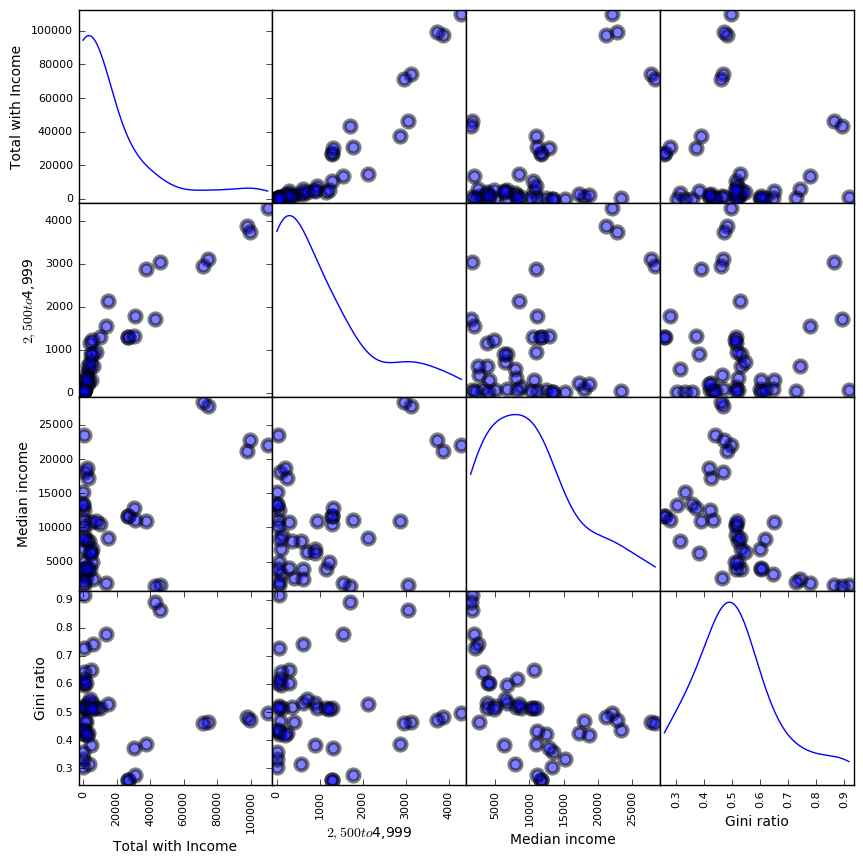

In [27]:
fig = pd.scatter_matrix(allfemales['all']
                   [[u'Total with Income',u'$2,500 to $4,999',
                     u'Median income',u'Gini ratio']],
                   linewidth= 3, s=300, figsize=(10,10), 
                        diagonal='kde') 

#### Figure 2: Scatter Matrix of Total Income, USD 2,500 to USD 4,999, Median Income and Gini Ratio for Female

In [35]:
allmales

{'all':     Characteristic  Total with Income  $1 to $2,499 or loss  $2,500 to $4,999  \
 0              NaN                NaN                   NaN               NaN   
 1              NaN           108706.0                4407.0            2665.0   
 2              NaN            83555.0                3217.0            2326.0   
 3              NaN            78263.0                2779.0            2184.0   
 4              NaN             7014.0                1478.0             280.0   
 5              NaN             1518.0                 804.0              62.0   
 6              NaN            21454.0                 555.0             859.0   
 7              NaN             2667.0                 298.0             283.0   
 8              NaN              456.0                 312.0              97.0   
 9              NaN             2899.0                 545.0             385.0   
 10             NaN              645.0                 103.0              87.0   
 11      

In [63]:
# Create a dataframe with total median incomes by gender, race by race.
income = pd.DataFrame(columns=['males','females'], index=['hispanic','all','black','white','asian'])
income.head()

,males,females
hispanic,NaN,NaN
all,NaN,NaN
black,NaN,NaN
white,NaN,NaN
asian,NaN,NaN


In [67]:
for k in allfemales:
    income["males"][k] = allmales[k]["Median income"][1]
    income["females"][k] = allfemales[k]["Median income"][1]

In [68]:
income

,males,females
hispanic,25411,17762
all,35228,22063
black,24855,20044
white,40122,23780
asian,40153,24840


In [69]:
income['males'][0]

25411.0

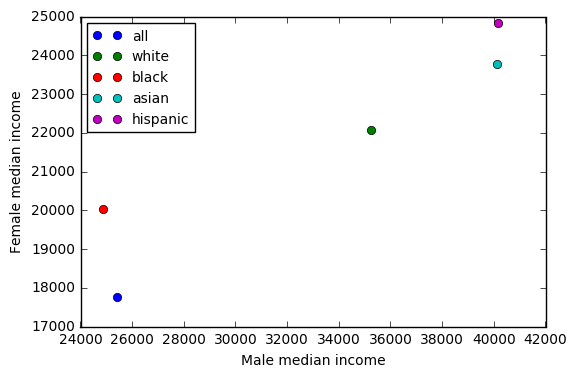

In [52]:
for i in range(5):
    pl.plot(income['males'][i],income['females'][i],'o')
pl.xlabel('Male median income')
pl.ylabel('Female median income')
pl.legend(['all','white','black','asian','hispanic'],fontsize=10, loc='best')

#### Figure 3: Scatter plots for Median Income by gender and race

In [98]:
m = list(income['males'])
f = list(income['females'])
income1 = pd.DataFrame(m,f)
income1

,0
17762.0,25411.0
22063.0,35228.0
20044.0,24855.0
23780.0,40122.0
24840.0,40153.0


In [139]:
predict=smf.ols(formula = 'f ~ m', data = income1).fit()
predict.params

Intercept    9989.844408
m               0.353141
dtype: float64

In [100]:
params = np.polyfit(m, f, 1)

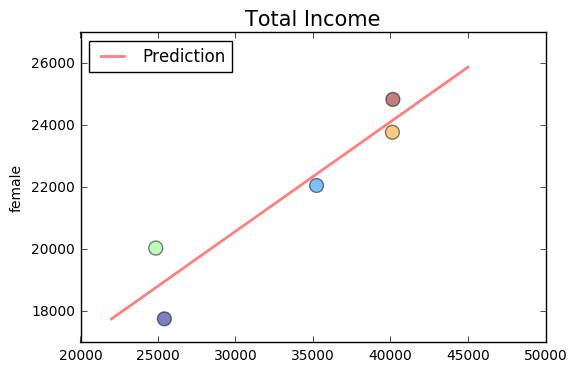

In [110]:
pl.scatter(m, f, c=range(1,6), s=100, alpha=0.5,) 
x=np.arange(22000,45000)
pl.plot(x, predict.params[1]*x+predict.params[0], linewidth = 2, color = 'red' , alpha = 0.5, label = 'Prediction')   
pl.ylabel("female", fontsize=10)
pl.title("Total Income", fontsize=15)
pl.legend(loc='best')

#### Figure 4: Linear Regression fit of Total Median Income by gender by Races

In [111]:
from scipy import stats
all_males=np.array([0., allmales['all']['Median income'][1],
                    allmales['white']['Median income'][1],
                    allmales['black']['Median income'][1],
                     allmales['hispanic']['Median income'][1],
                    allmales['asian']['Median income'][1]])

all_females=np.array([0.] + [allfemales[k]['Median income'][1] \
                             for k in ['all', 'white', 'black',
                                     'hispanic','asian']])
cor = stats.spearmanr(all_males, all_females)
beta1 = cor[0] * all_females.std() / all_males.std()
beta0 = all_females.mean() - beta1 * all_males.mean()
beta0, beta1

(2224.3609760454674, 0.57394829035421091)

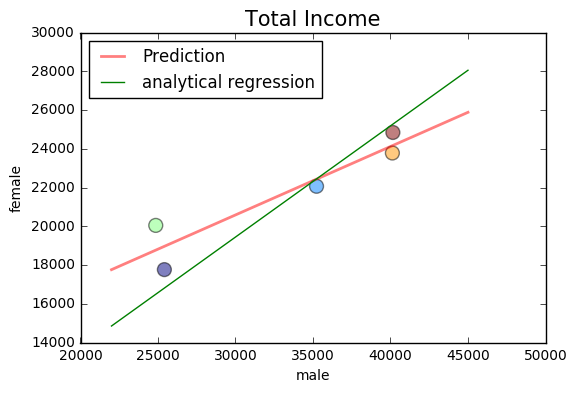

In [116]:
pl.scatter(m, f, c=range(1,6), s=100, alpha=0.5) 
x=np.arange(22000,45000)
pl.plot(x, predict.params[1]*x+predict.params[0], linewidth = 2, color = 'red' , alpha = 0.5, label = 'Prediction')   
pl.plot(x,beta0+beta1*x,'g-', label = 'analytical regression')
pl.xlabel("male", fontsize=10)
pl.ylabel("female", fontsize=10)
pl.title("Total Income", fontsize=15)
pl.legend(loc='best')

#### Figure 5: Numerical and Analytical Linear Regression Fit

In [153]:
all_males_allincomes = np.array(
    np.concatenate([allmales['all']['Median income'][:].values,
                    allmales['white']['Median income'][:].values,
                    allmales['black']['Median income'][:].values,
                    allmales['hispanic']['Median income'][:].values,
                    allmales['asian']['Median income'][:].values]).flatten())
#with a list comprehension syntax, but the result i the same as above
all_females_allincomes = np.array(
    np.concatenate([allfemales[k]['Median income'][:].values \
                    for k in ['all',
                                   'white', 'black', 
                                    'hispanic', 'asian']]).flatten())
mask = ~(np.isnan(all_males_allincomes) + np.isnan(all_females_allincomes))

In [165]:
df1=pd.DataFrame(all_males_allincomes[mask],columns=['male'])
df1['female']=all_females_allincomes[mask]

In [184]:
df1.head()

,male,female
0,35228.0,22063.0
1,39903.0,27736.0
2,40298.0,28402.0
3,19557.0,10732.0
4,2359.0,1635.0


In [166]:
predict1=smf.ols(formula = 'female ~ male', data = df1).fit()
predict1.params

Intercept    1493.039441
male            0.609021
dtype: float64

In [170]:
no_intercept=smf.OLS(df1['female'],df1['male']).fit()
no_intercept.params

male    0.671428
dtype: float64

In [159]:
cor = stats.spearmanr(df1.male, df1.female)
beta1 = cor[0] * df1.female.std() / df1.male.std()
beta0 = df1.female.mean() - beta1 * df1.male.mean()
beta0, beta1

(1293.7640487731387, 0.62234483903975324)

In [193]:
males[0]

25411.0

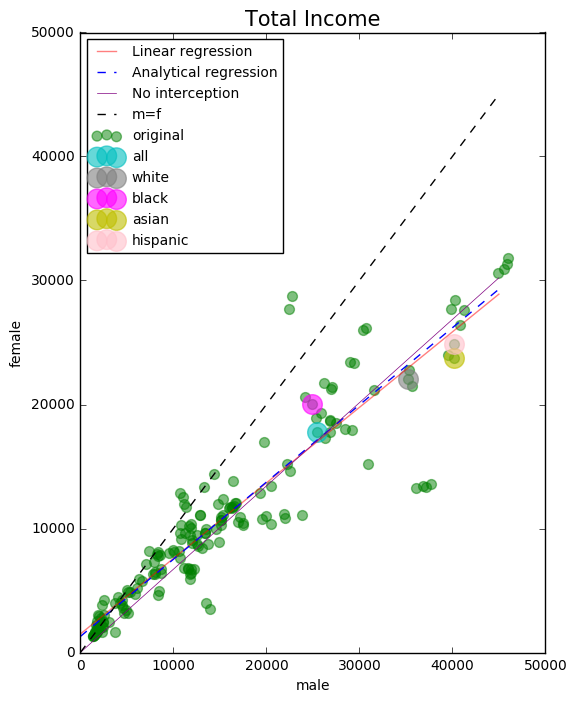

In [245]:
figsize(6,8)
pl.scatter(all_males_allincomes[mask], all_females_allincomes[mask], s=50, color ='g' ,alpha=0.5, label='original') 
pl.scatter(males[0],females[0],s=200,color='c',label='all',alpha=0.6)
pl.scatter(males[1],females[1],s=200,color='grey',label='white',alpha=0.6)
pl.scatter(males[2],females[2],s=200,color='magenta',label='black',alpha=0.6)
pl.scatter(males[3],females[3],s=200,color='y',label='asian',alpha=0.6)
pl.scatter(males[4],females[4],s=200,color='pink',label='hispanic',alpha=0.6)
x=np.arange(0,45000)
pl.plot(x, predict1.params[1]*x+predict1.params[0], linewidth = 1, color = 'red' , alpha = 0.5, label = 'Linear regression')   
pl.plot(x,beta0+beta1*x,'b--', linewidth = 1, label = 'Analytical regression')
pl.plot(x,no_intercept.params[0]*x,color='purple',label='No interception',linewidth=0.5)
pl.plot(x,x,'k--',label='m=f',linewidth=1)
pl.xlabel("male", fontsize=10)
pl.ylabel("female", fontsize=10)
pl.title("Total Income", fontsize=15)
pl.xlim(left=0)
pl.ylim(bottom=0)
pl.legend(fontsize=10, loc='best')

#### Figure 6: Different linear fits for the data

### 6. PREDICTION
Now pick a stipend (maybe your ideal stipend).
and predict what a woman in a position where a man recieves your ideal stipend would make

In [242]:
Female_predict = 50000*predict1.params[1]+predict1.params[0]
print ("Female predict income when male recieved $50000 is $%s" % Female_predict)

Female predict income when male recieved $50000 is $31944.065622


### 7. lastly do you have any comments about what these data tell us about race?

The White people and Asian earn much more than other races on average, but also they have much more gap between female income and male income.  We can generate two hypothesis to test these 2 foundings.